In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

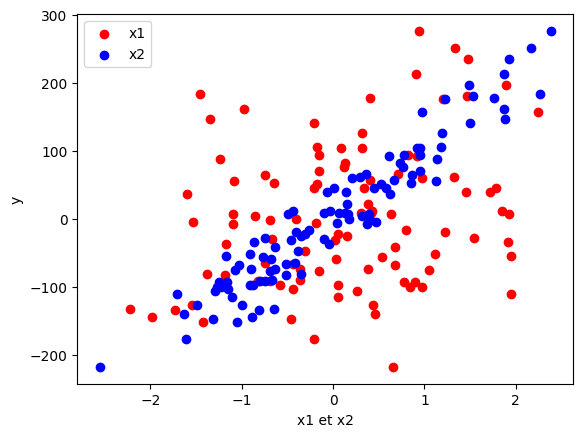

In [4]:
np.random.seed(0) # permet de reproduire l'aléatoire

np.random.seed(0) # permet de reproduire l'aléatoire

x, y = make_regression(n_samples=100, n_features=2, noise = 10) # creation d'un dataset (x, y) linéaire

# Afficher x1 en abscisse et y en ordonnée
plt.scatter(x[:, 0], y, c='red', label='x1')

# Afficher x2 en abscisse et y en ordonnée
plt.scatter(x[:, 1], y, c='blue', label='x2')

# Ajouter des labels et une légende
plt.xlabel('x1 et x2')
plt.ylabel('y')
plt.legend()

In [5]:
def model(X,theta):
  return X.dot(theta)

In [6]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [8]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [9]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [17]:
# Evaluer le modele

def evaluation(y,y_pred):
  mse= np.mean((y-y_pred)**2)
  r_sqrt= 1- np.sum((y-y_pred)**2)/np.sum((y-y.mean())**2)
  mae= np.mean(np.abs(y-y_pred))
  return(
      {
          "MSE":mse,
          "R²":r_sqrt,
          "MAE":mae
      }
  )

In [10]:
# Verification des dimensions
print(x.shape)


# redimensionner y
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 2)
(100, 1)


In [11]:
# Création de la matrice X, inclut le Biais
X = np.hstack((x, np.ones((x.shape[0], 1)))) # ajoute un vecteur Biais de dimension (x.shape[0], 1)

print(X.shape)
print(X[:10])

(100, 3)
[[ 1.05445173 -1.07075262  1.        ]
 [-0.36274117 -0.63432209  1.        ]
 [-0.85409574  0.3130677   1.        ]
 [ 1.3263859   0.29823817  1.        ]
 [-0.4615846  -1.31590741  1.        ]
 [ 1.94362119 -1.17312341  1.        ]
 [-1.60205766  0.62523145  1.        ]
 [-0.40178094  0.17742614  1.        ]
 [-0.97727788  1.86755799  1.        ]
 [ 0.37816252  0.15494743  1.        ]]


In [12]:
# Initialisation du vecteur theta aléatoire, avec 3 éléments (car X a trois colonnes)
theta = np.random.randn(3, 1)
theta

array([[-0.82646112],
       [ 0.78420863],
       [-0.1954172 ]])

In [15]:
n_iterations = 500
learning_rate = 0.01

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [22]:
predictions=model(X, theta_final)

In [18]:
evaluation(y,model(X,theta_final))

{'MSE': np.float64(89.40039556754614),
 'R²': np.float64(0.9916336221284596),
 'MAE': np.float64(7.354306703006)}

## Utilisation de sklearn fichier suivant